In [97]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [98]:
#Fetch the data from the api and store it in a dataframe
#data = requests.get('https://data.cityofnewyork.us/resource/5ebm-myj7.json').json()
#df = pd.DataFrame(data)

#Save a copy of the data in a csv file for future use
#df.to_csv('NewYorkHousingPrices.csv', index=False)
df = pd.read_csv('NewYorkHousingPrices.csv', skipinitialspace=True)

Elementary Data Analysis

In [99]:
#Describe the data 
pd.set_option('display.max_columns',None)
df.describe(include = 'all')

,borough,neighborhood,type_of_home,number_of_sales,lowest_sale_price,average_sale_price,median_sale_price,highest_sale_price,year
count,7788,7787,7788,7788.000000,7.788000e+03,7.788000e+03,7.788000e+03,7.788000e+03,7788.000000
unique,10,249,12,NaN,NaN,NaN,NaN,NaN,NaN
top,BROOKLYN,SUNNYSIDE,01 ONE FAMILY HOMES,NaN,NaN,NaN,NaN,NaN,NaN
freq,2010,72,1958,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,36.071135,7.516606e+05,1.288504e+06,1.228476e+06,2.228840e+06,2016.028762
std,NaN,NaN,NaN,51.107456,1.556395e+06,2.043002e+06,1.920821e+06,3.976381e+06,3.734848
min,NaN,NaN,NaN,1.000000,1.500000e+05,1.675000e+05,1.675000e+05,1.767500e+05,2010.000000
25%,NaN,NaN,NaN,5.000000,2.220000e+05,4.927410e+05,4.790000e+05,7.560000e+05,2013.000000
50%,NaN,NaN,NaN,16.000000,3.100000e+05,6.889090e+05,6.795500e+05,1.125000e+06,2016.000000
75%,NaN,NaN,NaN,47.000000,5.704150e+05,1.082073e+06,9.990000e+05,2.052875e+06,2019.000000


In [100]:
#Describe the data set
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')
print(f'There are {df.duplicated().sum()} duplicate rows')
print('=='*30)
print(' '*18, 'Data set Information')
print('=='*30)
print(df.info())

There are 7788 rows and 9 columns
There are 0 duplicate rows
                   Data set Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7788 entries, 0 to 7787
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   borough             7788 non-null   object
 1   neighborhood        7787 non-null   object
 2   type_of_home        7788 non-null   object
 3   number_of_sales     7788 non-null   int64 
 4   lowest_sale_price   7788 non-null   int64 
 5   average_sale_price  7788 non-null   int64 
 6   median_sale_price   7788 non-null   int64 
 7   highest_sale_price  7788 non-null   int64 
 8   year                7788 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 547.7+ KB
None


We can see from this description that our data is actually cleaned and no pre-processing is needed. 
We also see that we have 3 categorical variables (of Dtype object) and 6 numerical variables (of numeric Dtypes)

In [101]:
#Take a look at 01 ONE FAMILY HOMES
single_family_homes = df[df['type_of_home'] == '01 ONE FAMILY HOMES']
#Group by neighborhood
single_family_homes.describe(include = 'all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
borough,1958,5,QUEENS,521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood,1958,241,SUNNYSIDE,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type_of_home,1958,1,01 ONE FAMILY HOMES,1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_sales,1958.0,NaN,NaN,NaN,47.710419,60.963516,1.0,9.0,28.0,62.0,519.0
lowest_sale_price,1958.0,NaN,NaN,NaN,663493.467824,1519409.888423,150000.0,200000.0,242625.0,364750.0,24065000.0
average_sale_price,1958.0,NaN,NaN,NaN,1190645.953013,2211538.184774,210000.0,397392.75,534677.0,861115.0,24065000.0
median_sale_price,1958.0,NaN,NaN,NaN,1114868.675179,2072066.462334,185000.0,383874.0,509796.0,800000.0,24065000.0
highest_sale_price,1958.0,NaN,NaN,NaN,2249611.640449,4265181.141201,220000.0,675000.0,990000.0,1938750.0,51000000.0
year,1958.0,NaN,NaN,NaN,2014.027579,2.583952,2010.0,2012.0,2014.0,2016.0,2018.0


In [102]:
#Calculate the average sale price in Brooklyn over time by year
brooklyn = df[df['borough']=='BROOKLYN']

grouped = brooklyn.groupby('year')

# Initialize dictionaries to store total sale price and total number sold per year
total_sale_price_per_year = {}
total_number_sold_per_year = {}

# Calculate total sale price and total number sold per year
for year, group_data in grouped:
    total_sale_price = (group_data['average_sale_price'] * group_data['number_of_sales']).sum()
    total_number_sold = group_data['number_of_sales'].sum()
    total_sale_price_per_year[year] = total_sale_price
    total_number_sold_per_year[year] = total_number_sold

# Calculate average sale price per year
average_sale_price_per_year = {}
for year in total_sale_price_per_year:
    average_sale_price_per_year[year] = total_sale_price_per_year[year] / total_number_sold_per_year[year]

print("Average Sale Price per Year:")
for year, avg_price in average_sale_price_per_year.items():
    print(f"{year}: ${avg_price:.2f}")

Average Sale Price per Year:
2010: $619089.54
2011: $622999.45
2012: $686988.06
2013: $716287.86
2014: $827115.82
2015: $937778.04
2016: $985343.55
2017: $1054410.49
2018: $1102285.69
2019: $1148954.49
2020: $1203688.98
2021: $1341675.61


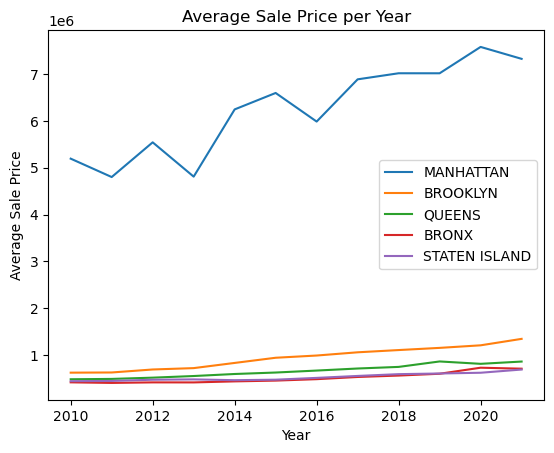

In [103]:
#Repeat for all boroughs and graph the results
boroughs = ['MANHATTAN', 'BROOKLYN', 'QUEENS', 'BRONX', 'STATEN ISLAND']
borough_prices = dict()
for borough in boroughs:
    b = df[df['borough']==borough]

    grouped = b.groupby('year')

    # Initialize dictionaries to store total sale price and total number sold per year
    total_sale_price_per_year = {}
    total_number_sold_per_year = {}

    # Calculate total sale price and total number sold per year
    for year, group_data in grouped:
        total_sale_price = (group_data['average_sale_price'] * group_data['number_of_sales']).sum()
        total_number_sold = group_data['number_of_sales'].sum()
        total_sale_price_per_year[year] = total_sale_price
        total_number_sold_per_year[year] = total_number_sold

    # Calculate average sale price per year
    price_per_year = []
    average_sale_price_per_year = {}
    for year in total_sale_price_per_year:
        average_sale_price_per_year[year] = total_sale_price_per_year[year] / total_number_sold_per_year[year]
        price_per_year.append([year, average_sale_price_per_year[year]])
    borough_prices[borough] = price_per_year

    plt.plot(*zip(*price_per_year), label=borough)
plt.xlabel('Year')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price per Year')
plt.legend()
plt.show()

If we aim to understand the fastest growing market, it would be much easier to look at the year over year percent increase

|   Year | Percent Increase   |
|--------+--------------------|
|   2011 | 0.63 %             |
|   2012 | 10.27 %            |
|   2013 | 4.26 %             |
|   2014 | 15.47 %            |
|   2015 | 13.38 %            |
|   2016 | 5.07 %             |
|   2017 | 7.01 %             |
|   2018 | 4.54 %             |
|   2019 | 4.23 %             |
|   2020 | 4.76 %             |


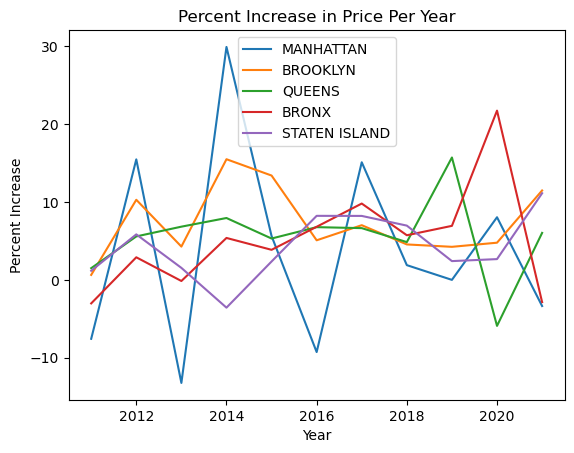

In [104]:
#take the percent increase in price for each borough and plot it
for borough, price_per_year in borough_prices.items():
    percent_increase = []
    for i in range(1, len(price_per_year)):
        percent_increase.append((price_per_year[i][1] - price_per_year[i-1][1])/price_per_year[i-1][1]*100)
    plt.plot(range(2011, 2022), percent_increase, label=borough)
    
    if borough == 'BROOKLYN':
        years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
        for i in range(len(years)):
            years[i] = str(years[i])
            percent_increase[i] = str(round(percent_increase[i],2)) + ' %'
        print(tabulate([['2011', percent_increase[0]], ['2012', percent_increase[1]], ['2013', percent_increase[2]], ['2014', percent_increase[3]], ['2015', percent_increase[4]], ['2016', percent_increase[5]], ['2017', percent_increase[6]], ['2018', percent_increase[7]], ['2019', percent_increase[8]], ['2020', percent_increase[9]]], headers=['Year', 'Percent Increase'], tablefmt='orgtbl'))
plt.legend()
plt.xlabel('Year')
plt.ylabel('Percent Increase')
plt.title('Percent Increase in Price Per Year')
plt.show()

    

In [105]:
#Make a table with the total percent increase in average sale price 
from tabulate import tabulate
boroughs = []
percent_increase = []
for borough, price_per_year in borough_prices.items():
    boroughs.append(borough)
    percent_increase.append(str(int((-price_per_year[0][1] + price_per_year[len(price_per_year)-1][1])/price_per_year[len(price_per_year)-1][1]*10000)/100)+'%')
print(tabulate(np.array([boroughs, percent_increase]).transpose(), headers=['Borough', 'Percent Increase 2010-2021']))

Borough        Percent Increase 2010-2021
-------------  ----------------------------
MANHATTAN      29.11%
BROOKLYN       53.85%
QUEENS         44.18%
BRONX          41.46%
STATEN ISLAND  36.27%


Predictions, we choose to look at Brooklyn which has the largest percent increase over the dataset, and we want to fit a graph to that and then predict what the average sale price will be next year. 

In [106]:
#Use linear regression to predict price
from sklearn.linear_model import LinearRegression
#looking at only the data from brooklyn
#Unpack the dictionary
years = []
prices = []
for entry in borough_prices['BROOKLYN']:
    years.append(entry[0])
    prices.append(entry[1])
years = np.array(years).reshape(-1, 1)
prices = np.array(prices).reshape(-1, 1)
model = LinearRegression()
model.fit(years, prices)
#Analyze the error and predict 2024
from sklearn.metrics import mean_squared_error

predicted_prices = model.predict(years)
mae = mean_squared_error(prices, predicted_prices)
print("Predicted Price 2024:", '$'+str(int(model.predict([[2024]])[0][0])))
print("Percent Increase 2024:", str(int((model.predict([[2024]])[0][0] - prices[-1][0]) / prices[-1][0]/2 * 100)) + '%')


Predicted Price 2024: $1503920
Percent Increase 2024: 6%
